## Charger la matrice 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

matrice1 = np.zeros((8, 8))

def matrice_web(matrice):
    with open("courtois.txt") as f:
        l = 0
        l_m = 0

        for ligne in f:
            col = ligne.split()
            if l > 1:
                for i in range(2, len(col), 2):
                    matrice[l_m, int(col[i])-1] = float(col[i+1])
                l_m = l_m + 1 
            l = l + 1
    return matrice

matrice_web(matrice1)

array([[8.500e-01, 0.000e+00, 1.490e-01, 9.000e-04, 0.000e+00, 5.000e-05,
        0.000e+00, 5.000e-05],
       [1.000e-01, 6.500e-01, 2.490e-01, 0.000e+00, 9.000e-04, 5.000e-05,
        0.000e+00, 5.000e-05],
       [1.000e-01, 8.000e-01, 9.960e-02, 4.000e-04, 0.000e+00, 0.000e+00,
        1.000e-04, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00],
       [5.000e-04, 0.000e+00, 4.000e-04, 3.900e-01, 6.000e-01, 1.000e-04,
        0.000e+00, 0.000e+00],
       [0.000e+00, 5.000e-05, 0.000e+00, 0.000e+00, 5.000e-05, 6.000e-01,
        2.499e-01, 1.500e-01],
       [3.000e-05, 0.000e+00, 3.000e-05, 4.000e-05, 0.000e+00, 1.000e-01,
        8.000e-01, 9.990e-02],
       [0.000e+00, 5.000e-05, 0.000e+00, 0.000e+00, 5.000e-05, 1.999e-01,
        2.500e-01, 5.500e-01]])

## Calcul Pagerank de google

In [3]:
def pagerank(matrice, nb_page):
    coef = 0.85
    epsilon = 0.005

    v = np.random.rand(nb_page, 1)
    v = v / np.linalg.norm(v, 1)

    m = coef * matrice + (1 - coef) / nb_page

    for i in range(100):
        v2 = m @ v
        if np.linalg.norm(v2 - v, 1) < epsilon:
            break
        v = v2
    return v

orig = pagerank(matrice1, len(matrice1))
print(orig)

[[0.02604881]
 [0.02606427]
 [0.02607093]
 [0.00326597]
 [0.00927255]
 [0.02615106]
 [0.02615094]
 [0.02615106]]


## Modification graphe de web

### Identifier les pages sans lien de sortie

In [4]:
ligne_null = []
for i, ligne in enumerate(matrice1):
    if all(element == 0 for element in ligne):
        ligne_null.append(i+1)
print("Les pages sans lien de sortie : ", ligne_null)

dupli = 0
for page in matrice1:
    if page[3] != 0:
        dupli += 1

print("Nombre de duplication à faire : ", dupli)

Les pages sans lien de sortie :  [4]
Nombre de duplication à faire :  4


### Graphe du web modifié

In [5]:
nom = 1
flag = True

with open("courtois.txt", "r") as f:
    lignes = f.readlines()
    with open("courtoisV2.txt", "w") as f2:
        for i in lignes:
            liste = i[3:].split()
            for ele in liste:
                if ele == "4":
                    f2.write(i.replace(" 4 ", " (4,"+ str(nom)+") "))
                    nom += 1
                    flag = False
            if flag:
                f2.write(i)
            flag = True

with open("courtoisV2.txt", "a") as f2:
    for i in range(nom - 1):
        f2.write("\n(4,"+ str(i)+")" + " 0")


In [6]:
matrice2 = np.zeros((12,12))

matrice_web(matrice2)

array([[8.500e-01, 0.000e+00, 1.490e-01, 9.000e-04, 0.000e+00, 5.000e-05,
        0.000e+00, 5.000e-05, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e-01, 6.500e-01, 2.490e-01, 0.000e+00, 9.000e-04, 5.000e-05,
        0.000e+00, 5.000e-05, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e-01, 8.000e-01, 9.960e-02, 4.000e-04, 0.000e+00, 0.000e+00,
        1.000e-04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [5.000e-04, 0.000e+00, 4.000e-04, 3.900e-01, 6.000e-01, 1.000e-04,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 5.000e-05, 0.000e+00, 0.000e+00, 5.000e-05, 6.000e-01,
        2.499e-01, 1.500e-01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [3.000e-05, 0.000e+00, 3.000e-05, 4.000e-05, 0.000e+00, 1.000e-01,
        8.000e-01, 9.990e-02, 0.

In [7]:
modif = pagerank(matrice2, len(matrice2))
print(modif)

[[0.01096449]
 [0.0109704 ]
 [0.01097386]
 [0.00098168]
 [0.00295331]
 [0.01085277]
 [0.01085277]
 [0.01085277]
 [0.00098168]
 [0.00098168]
 [0.00098168]
 [0.00098168]]


In [8]:
modif = pagerank(matrice2, len(matrice2))
print(modif)

[[0.01091878]
 [0.01092476]
 [0.01092822]
 [0.00097519]
 [0.00293384]
 [0.01075404]
 [0.01075404]
 [0.01075404]
 [0.00097519]
 [0.00097519]
 [0.00097519]
 [0.00097519]]


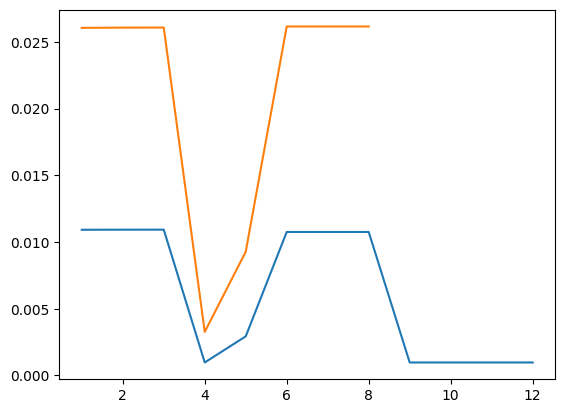

In [9]:
x = np.arange(1, len(matrice2)+1)
x2 = np.arange(1, len(matrice1)+1)

plt.plot(x, modif)
plt.plot(x2, orig)
plt.show()